# Quality Analysis (General)

#### Updated: May 19, 2023

#  

Quality analysis pipeline after phase 2 of Alouette processing (OCR processing phase):

In [119]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

#  

#### Functions:

In [120]:
def stage_1_stat(resultDir, logDir):
    
    df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
    n_images = df_inventory['images'].sum()
    df_s1 = pd.read_csv(resultDir + 'result_stage1_raw.csv', low_memory=False)
    n_proc = len(df_s1.loc[df_s1['processed_image_class'] == 'num']) + len(df_s1.loc[df_s1['processed_image_class'] == 'dot'])
    n_loss = len(df_s1.loc[df_s1['processed_image_class'] == 'loss'])
    n_outlier = len(df_s1.loc[df_s1['processed_image_class'] == 'outlier'])
    n_unproc = n_images - n_proc - n_outlier - n_loss
    
    print('# of images: ' + str(n_images))
    print('# of images processed after stage 1 processing: ' + str(n_proc))
    print('% of images processed after stage 1 processing: ' + str(round(((n_proc/n_images)*100), 2)) + ' %')
    print('')
    print("% total loss after stage 1 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
    print('% of images unprocessed after stage 1 processing: ' + str(round(((n_unproc/n_images)*100), 2)) + ' %')
    print("% of images classified as 'loss' after stage 1 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
    print("% of images classified as 'outlier' after stage 1 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')
    
    return df_s1

In [121]:
def stage_2_stat(resultDir, logDir):
    
    df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
    n_images = df_inventory['images'].sum()
    df_s2 = pd.read_csv(resultDir + 'result_stage2_raw.csv', low_memory=False)
    n_num2 = len(df_s2.loc[df_s2['processed_image_class'] == 'num2'])
    n_num = len(df_s2.loc[df_s2['processed_image_class'] == 'num'])
    n_dot = len(df_s2.loc[df_s2['processed_image_class'] == 'dot'])
    n_proc2 = n_num2 + n_num + n_dot
    n_loss = len(df_s2.loc[df_s2['processed_image_class'] == 'loss'])
    n_outlier = len(df_s2.loc[df_s2['processed_image_class'] == 'outlier'])
    
    print('# of images processed after stage 2 processing: ' + str(n_proc2))
    print('% of images processed after stage 2 processing: ' + str(round(((n_proc2/n_images)*100), 2)) + ' %')
    print('')
    print("% of images classified as 'num2' after stage 2 processing: " + str(round(((n_num2/n_images)*100), 2)) + ' %')
    print("% of images classified as 'num' after stage 2 processing: " + str(round(((n_num/n_images)*100), 2)) + ' %')
    print("% of images classified as 'dot' after stage 2 processing: " + str(round(((n_dot/n_images)*100), 2)) + ' %')
    print('')
    print("% total loss after stage 2 processing: " + str(round((((n_unproc + n_loss + n_outlier)/n_images)*100), 2)) + ' %')
    print("% of images classified as 'loss' after stage 2 processing: " + str(round(((n_loss/n_images)*100), 2)) + ' %')
    print("% of images classified as 'outlier' after stage 2 processing: " + str(round(((n_outlier/n_images)*100), 2)) + ' %')
    
    return df_s2

In [122]:
def master_stat(resultDir, logDir):
    
    df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
    n_images = df_inventory['images'].sum()
    df_master = pd.read_csv(resultDir + 'result_master.csv', low_memory=False)
    n_master = len(df_master.loc[(~pd.isna(df_master['Station_Code'])) & (df_master['time_quality'] == 1)])
    n_tq1 = len(df_master.loc[df_master['time_quality'] == 1])
    n_tq2 = len(df_master.loc[df_master['time_quality'] == 2])
    n_tq3 = len(df_master.loc[df_master['time_quality'] == 3])
    n_tq4 = len(df_master.loc[df_master['time_quality'] == 4])
    
    print('# of images fully read after stage 2 processing: ' + str(n_master))
    print('% of images fully read after stage 2 processing (yield): ' + str(round(((n_master/n_images)*100), 2)) + ' %')
    print('')
    print('% time quality level 1 yield: ' + str(round(((n_tq1/n_images)*100), 2)) + ' %')
    print('% at least time quality level 2: ' + str(round((((n_tq1+n_tq2)/n_images)*100), 2)) + ' %')
    print('% at least time quality level 3: ' + str(round((((n_tq1+n_tq2+n_tq3)/n_images)*100), 2)) + ' %')
    print('% at least time quality level 4: ' + str(round((((n_tq1+n_tq2+n_tq3+n_tq4)/n_images)*100), 2)) + ' %')
    
    return df_master

In [159]:
def construct_process_summary(resultDir, logDir):
    
    df_inventory = pd.read_csv(logDir + 'image_inventory.csv')
    df_process_log = pd.read_csv(logDir + 'process_log.csv')
    df_s2 = pd.read_csv(resultDir + 'result_stage2_raw.csv', low_memory=False)
    df_p1 = df_process_log.sort_values('Process_timestamp', ascending=True)
    df_p1 = df_p1.drop_duplicates(subset=['subdir_id'], keep='last') 
    print(len(df_inventory))
    print(len(df_p1))
    df_process_log2 = pd.read_csv(logDir + 'process_log_OCR.csv')
    df_p2 = df_process_log2.sort_values('Process_timestamp', ascending=True)
    df_p2 = df_p2.drop_duplicates(subset=['subdir_id'], keep='last') 
    print(len(df_p2))
    
    df_sum1 = df_inventory.merge(df_p1[['Images_processed', 'Images_loss', 'Images_outlier', 'Process_time', 'subdir_id']], how='left', on='subdir_id')
    df_sum1 = df_sum1.rename(columns={
        'images': 'n_images',
        'Images_loss': 'n_stage1_loss',
        'Images_outlier': 'n_stage1_outlier',
        'Process_time': 'process_time_stage1'
    })
    df_sum1['n_stage1_processed'] = df_sum1['Images_processed'] - df_sum1['n_stage1_loss'] - df_sum1['n_stage1_outlier']
    df_sum1['n_stage1_unprocessed'] = df_sum1['n_images'] - df_sum1['Images_processed']
    df_sum1 = df_sum1[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                      'n_stage1_outlier', 'process_time_stage1', 'subdir_id']]
    
    df_sum2 = df_sum1.merge(df_p2[['Process_time', 'subdir_id']], how='left', on='subdir_id')
    df_sum2 = df_sum2.rename(columns={
        'Process_time': 'process_time_stage2'
    })
    df_sum2 = df_sum2[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                      'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'subdir_id']]
    
    df_s2['subdir_id'] = df_s2['Directory'] + '_' + df_s2['Subdirectory']
    df_sum3_ = pd.DataFrame()
    for i in range(0, len(df_sum2)):
        subdir_id = df_sum2['subdir_id'].iloc[i]
        df_s2_ = df_s2[['processed_image_class', 'filename', 'subdir_id']].loc[df_s2['subdir_id'] == subdir_id]
        if len(df_s2_) > 0:
            n_s2_proc = len(df_s2_.loc[df_s2_['processed_image_class'] == 'num2']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'num']) + len(df_s2_.loc[df_s2_['processed_image_class'] == 'dot'])
            n_s2_loss = len(df_s2_.loc[df_s2_['processed_image_class'] == 'loss'])
            n_s2_outlier = len(df_s2_.loc[df_s2_['processed_image_class'] == 'outlier'])
            row = pd.DataFrame({
                'n_stage2_processed': n_s2_proc,
                'n_stage2_loss': n_s2_loss,
                'n_stage2_outlier': n_s2_outlier,
                'subdir_id': subdir_id
            }, index=[0])
            df_sum3_ = pd.concat([df_sum3_, row])

    df_sum3 = df_sum2.merge(df_sum3_, how='left', on='subdir_id')
    df_sum3 = df_sum3[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                      'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                      'n_stage2_outlier', 'subdir_id']]
    
    return df_sum3 

In [160]:
def construct_process_summary2(df_sum3, resultDir):
    
    df_pp = pd.read_csv(resultDir + 'result_postprocess_raw.csv', low_memory=False)
    df_pp['subdir_id'] = df_pp['Directory'] + '_' + df_pp['Subdirectory']
    
    df_sum4_ = pd.DataFrame()
    for i in range(0, len(df_sum3)):
        subdir_id = df_sum3['subdir_id'].iloc[i]
        df_pp_ = df_pp[['processed_image_class', 'filename', 'subdir_id']].loc[df_pp['subdir_id'] == subdir_id]
        if len(df_pp_) > 0:
            n_pp_proc = len(df_pp_.loc[df_pp_['processed_image_class'] == 'num2']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'num']) + len(df_pp_.loc[df_pp_['processed_image_class'] == 'dot'])
            n_pp_loss = len(df_pp_.loc[df_pp_['processed_image_class'] == 'loss'])
            n_pp_outlier = len(df_pp_.loc[df_pp_['processed_image_class'] == 'outlier'])
            row = pd.DataFrame({
                'n_postprocess_processed': n_pp_proc,
                'n_postprocess_loss': n_pp_loss,
                'n_postprocess_outlier': n_pp_outlier,
                'subdir_id': subdir_id
            }, index=[0])
            df_sum4_ = pd.concat([df_sum4_, row])

    df_sum4 = df_sum3.merge(df_sum4_, how='left', on='subdir_id')
    df_sum4 = df_sum4[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                      'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                      'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 'subdir_id']]
    
    return df_sum4

In [191]:
def construct_process_summary3(df_sum4, resultDir, logDir):
    
    df_master = pd.read_csv(resultDir + 'result_master.csv', low_memory=False)
    df_master['subdir_id'] = df_master['Directory'] + '_' + df_master['Subdirectory']
    
    df_sum5_ = pd.DataFrame()
    for i in range(0, len(df_sum4)):
        subdir_id = df_sum4['subdir_id'].iloc[i]
        df_master_ = df_master[['processed_image_class', 'filename', 'subdir_id']].loc[df_master['subdir_id'] == subdir_id]
        if len(df_master_) > 0:
            n_mas = len(df_master_)
            n_mas_num2 = len(df_master_.loc[df_master_['processed_image_class'] == 'num2'])
            n_mas_num = len(df_master_.loc[df_master_['processed_image_class'] == 'num'])
            n_mas_dot = len(df_master_.loc[df_master_['processed_image_class'] == 'dot'])
            row = pd.DataFrame({
                'n_master': n_mas,
                'n_master_num2': n_mas_num2,
                'n_master_num': n_mas_num,
                'n_master_dot': n_mas_dot,
                'subdir_id': subdir_id
            }, index=[0])
            df_sum5_ = pd.concat([df_sum5_, row])

    df_sum5 = df_sum4.merge(df_sum5_, how='left', on='subdir_id')
    df_sum5 = df_sum5[['Directory', 'Subdirectory', 'n_images', 'n_stage1_processed', 'n_stage1_unprocessed', 'n_stage1_loss',
                      'n_stage1_outlier', 'process_time_stage1', 'process_time_stage2', 'n_stage2_processed', 'n_stage2_loss',
                      'n_stage2_outlier', 'n_postprocess_processed', 'n_postprocess_loss', 'n_postprocess_outlier', 
                      'n_master', 'n_master_num2', 'n_master_num', 'n_master_dot', 'subdir_id']]
    print(len(df_sum5))
    df_sum5.to_csv(logDir + 'process_summary.csv', index=False)
    
    return df_sum5

#  

#### Process Summary - LONG STEP, DO NOT RUN if process_summary already created:

BATCH I:

In [193]:
df_sum3 = construct_process_summary(resultDir=resultDir_I, logDir=logDir_I)
df_sum4 = construct_process_summary2(df_sum3=df_sum3, resultDir=resultDir_I)
df_summary = construct_process_summary3(df_sum4=df_sum4, resultDir=resultDir_I, logDir=logDir_I)

2638
2639
2533
2638


BATCH II:

In [194]:
df_sum3 = construct_process_summary(resultDir=resultDir_II, logDir=logDir_II)
df_sum4 = construct_process_summary2(df_sum3=df_sum3, resultDir=resultDir_II)
df_summary = construct_process_summary3(df_sum4=df_sum4, resultDir=resultDir_II, logDir=logDir_II)

2416
2417
1977
2416


#  

## Combine BATCH I and II, Analyze:

In [205]:
rootDir_tot = 'L:/DATA/Alouette_I/Total/'
resultDir_tot = rootDir_tot + '05_result/'
logDir_tot = rootDir_tot + '06_log/'

In [206]:
df_inventory_I = pd.read_csv(logDir_I + 'image_inventory.csv')
print(len(df_inventory_I))
df_inventory_II = pd.read_csv(logDir_II + 'image_inventory.csv')
print(len(df_inventory_II))
df_inventory_tot = pd.concat([df_inventory_I, df_inventory_II])
df_inventory_tot = df_inventory_tot.sort_values('subdir_id')
df_inventory_tot.to_csv(logDir_tot + 'image_inventory.csv', index=False)

2638
2416


In [208]:
df_s1_I = pd.read_csv(resultDir_I + 'result_stage1_raw.csv', low_memory=False)
print(len(df_s1_I))
df_s1_II = pd.read_csv(resultDir_II + 'result_stage1_raw.csv', low_memory=False)
print(len(df_s1_II))
df_s1_tot = pd.concat([df_s1_I, df_s1_II])
df_s1_tot = df_s1_tot.sort_values(['Directory', 'Subdirectory', 'filename'])
df_s1_tot.to_csv(resultDir_tot + 'result_stage1_raw.csv', index=False)

841115
600621


In [209]:
df_s2_I = pd.read_csv(resultDir_I + 'result_stage2_raw.csv', low_memory=False)
print(len(df_s2_I))
df_s2_II = pd.read_csv(resultDir_II + 'result_stage2_raw.csv', low_memory=False)
print(len(df_s2_II))
df_s2_tot = pd.concat([df_s2_I, df_s2_II])
df_s2_tot = df_s2_tot.sort_values(['Directory', 'Subdirectory', 'filename'])
df_s2_tot.to_csv(resultDir_tot + 'result_stage2_raw.csv', index=False)

840652
600621


In [222]:
df_master_I = pd.read_csv(resultDir_I + 'result_master.csv', low_memory=False)
print(len(df_master_I))
df_master_II = pd.read_csv(resultDir_II + 'result_master.csv', low_memory=False)
print(len(df_master_II))
df_master_tot = pd.concat([df_master_I, df_master_II])
df_master_tot = df_master_tot.sort_values('Timestamp')
df_master_tot.to_csv(resultDir_tot + 'result_master.csv', index=False)
print(len(df_master_tot))

524845
216380
741225


In [225]:
df_summary_I = pd.read_csv(logDir_I + 'process_summary.csv')
print(len(df_summary_I))
df_summary_II = pd.read_csv(logDir_II + 'process_summary.csv')
print(len(df_summary_II))
df_summary_tot = pd.concat([df_summary_I, df_summary_II])
df_summary_tot = df_summary_tot.sort_values('subdir_id')
df_summary_tot.to_csv(logDir_tot + 'process_summary.csv', index=False)
print(len(df_summary_tot))

2638
2416
5054


#### Stage 1 - Overall Statistics:

In [213]:
df_s1 = stage_1_stat(resultDir=resultDir_tot, logDir=logDir_tot)

# of images: 1612104
# of images processed after stage 1 processing: 1219418
% of images processed after stage 1 processing: 75.64 %

% total loss after stage 1 processing: 24.36 %
% of images unprocessed after stage 1 processing: 10.57 %
% of images classified as 'loss' after stage 1 processing: 8.55 %
% of images classified as 'outlier' after stage 1 processing: 5.24 %


In [214]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,38122
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,22546
image_segmentation.trim_raw_metadata.trimming_metadata,10550
ionogram_content_extraction.extract_all_coordinates_ionogram_trace.extract_coord_subdir,662
image_segmentation.extract_ionogram_from_scan.extract_ionogram,18


In [215]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,81777
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,2731


####  

#### Stage 2 - Overall Statistics:

In [216]:
df_s2 = stage_2_stat(resultDir=resultDir_tot, logDir=logDir_tot)

# of images processed after stage 2 processing: 942093
% of images processed after stage 2 processing: 58.44 %

% of images classified as 'num2' after stage 2 processing: 9.06 %
% of images classified as 'num' after stage 2 processing: 44.81 %
% of images classified as 'dot' after stage 2 processing: 4.57 %

% total loss after stage 2 processing: 33.72 %
% of images classified as 'loss' after stage 2 processing: 25.8 %
% of images classified as 'outlier' after stage 2 processing: 5.16 %


In [217]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",1213
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",363
"metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type, OCR read metadata contains letters",35
"image_segmentation.trim_raw_metadata.trimming_metadata, OCR read metadata contains letters",20
"image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier, OCR read metadata contains letters",9
"ionogram_content_extraction.extract_all_coordinates_ionogram_trace.extract_coord_subdir, OCR read metadata contains letters",6


In [218]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,246360
OCR read metadata contains letters,23984
metadata was interpreted to be num type,4087
metadata was interpreted to be dot type,4073


In [219]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,80533
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,2722


#### Master - Overall Statistics:

In [223]:
df_master = master_stat(resultDir=resultDir_tot, logDir=logDir_tot)

# of images fully read after stage 2 processing: 709672
% of images fully read after stage 2 processing (yield): 44.02 %

% time quality level 1 yield: 44.02 %
% at least time quality level 2: 44.35 %
% at least time quality level 3: 44.66 %
% at least time quality level 4: 45.98 %


#### Quality by subdirectory:

In [226]:
df_summary = pd.read_csv(logDir_tot + 'process_summary.csv')
print(len(df_summary))

5054


<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

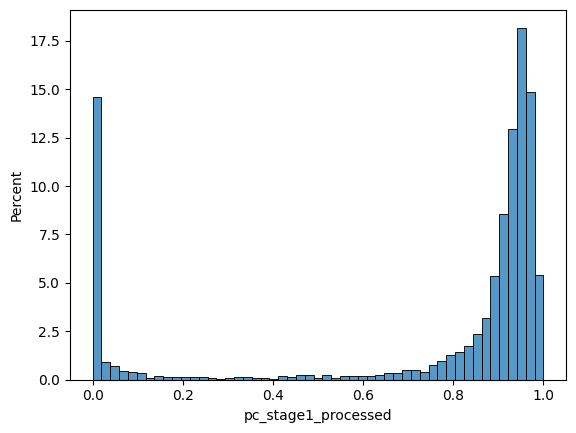

In [227]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

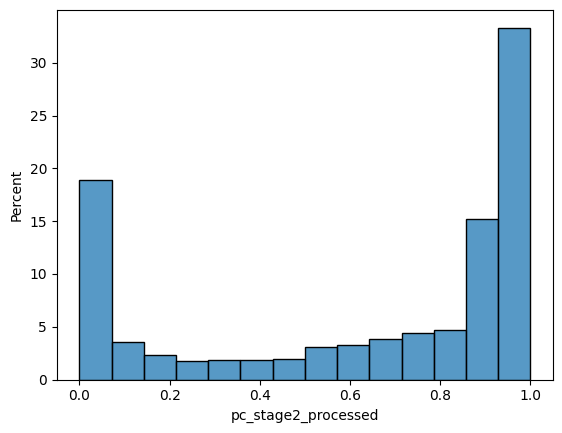

In [228]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

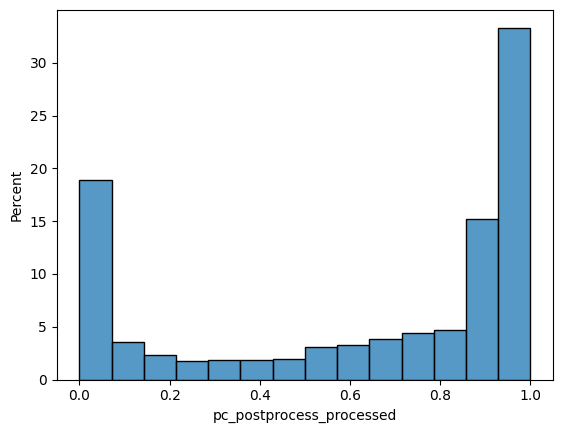

In [229]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

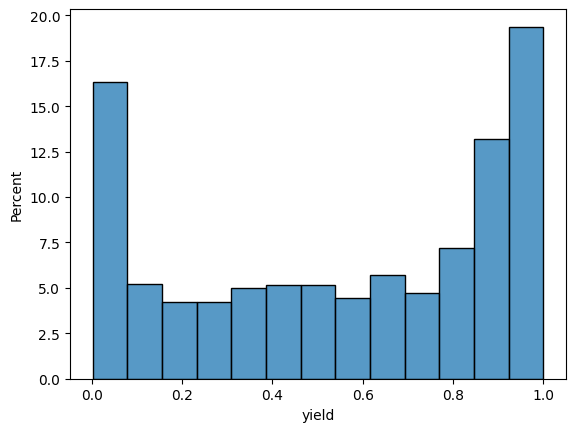

In [230]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')

# 

## Compare BATCH I to BATCH II:

In [126]:
rootDir_I = 'L:/DATA/Alouette_I/BATCH_I_Run2/'
resultDir_I = rootDir_I + '05_result/'
logDir_I = rootDir_I + '06_log/'

In [127]:
rootDir_II = 'L:/DATA/Alouette_I/BATCH_II_Run2/'
resultDir_II = rootDir_II + '05_result/'
logDir_II = rootDir_II + '06_log/'

#### Stage 1 - Overall Statistics:

BATCH I:

In [128]:
df_s1 = stage_1_stat(resultDir=resultDir_I, logDir=logDir_I)

# of images: 885527
# of images processed after stage 1 processing: 769686
% of images processed after stage 1 processing: 86.92 %

% total loss after stage 1 processing: 13.08 %
% of images unprocessed after stage 1 processing: 5.02 %
% of images classified as 'loss' after stage 1 processing: 4.84 %
% of images classified as 'outlier' after stage 1 processing: 3.23 %


In [129]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,13025
image_segmentation.trim_raw_metadata.trimming_metadata,6582
ionogram_content_extraction.extract_all_coordinates_ionogram_trace.extract_coord_subdir,662
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,250
image_segmentation.extract_ionogram_from_scan.extract_ionogram,17


In [130]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,27349
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1220


BATCH II:

In [131]:
df_s1 = stage_1_stat(resultDir=resultDir_II, logDir=logDir_II)

# of images: 726577
# of images processed after stage 1 processing: 449732
% of images processed after stage 1 processing: 61.9 %

% total loss after stage 1 processing: 38.1 %
% of images unprocessed after stage 1 processing: 17.34 %
% of images classified as 'loss' after stage 1 processing: 13.07 %
% of images classified as 'outlier' after stage 1 processing: 7.7 %


In [132]:
df_loss_bd = df_s1.loc[df_s1['processed_image_class'] == 'loss'].groupby(['func_name']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
func_name,
metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type,37872
ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth,9521
image_segmentation.trim_raw_metadata.trimming_metadata,3968
image_segmentation.extract_ionogram_from_scan.extract_ionogram,1


In [133]:
df_outlier_bd = df_s1.loc[df_s1['processed_image_class'] == 'outlier'].groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,54428
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1511


#### Stage 2 - Overall Statistics:

BATCH I:

In [134]:
df_s2 = stage_2_stat(resultDir=resultDir_I, logDir=logDir_I)

# of images processed after stage 2 processing: 668233
% of images processed after stage 2 processing: 75.46 %

% of images classified as 'num2' after stage 2 processing: 4.6 %
% of images classified as 'num' after stage 2 processing: 63.38 %
% of images classified as 'dot' after stage 2 processing: 7.49 %

% total loss after stage 2 processing: 24.49 %
% of images classified as 'loss' after stage 2 processing: 16.26 %
% of images classified as 'outlier' after stage 2 processing: 3.21 %


In [135]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",176
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",143
"ionogram_content_extraction.extract_all_coordinates_ionogram_trace.extract_coord_subdir, OCR read metadata contains letters",6
"image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier, OCR read metadata contains letters",1


In [136]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,90129
OCR read metadata contains letters,7441
metadata was interpreted to be dot type,1878
metadata was interpreted to be num type,1701


In [137]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,27175
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1219


BATCH II:

In [138]:
df_s2 = stage_2_stat(resultDir=resultDir_II, logDir=logDir_II)

# of images processed after stage 2 processing: 273860
% of images processed after stage 2 processing: 37.69 %

% of images classified as 'num2' after stage 2 processing: 14.51 %
% of images classified as 'num' after stage 2 processing: 22.17 %
% of images classified as 'dot' after stage 2 processing: 1.01 %

% total loss after stage 2 processing: 51.09 %
% of images classified as 'loss' after stage 2 processing: 37.42 %
% of images classified as 'outlier' after stage 2 processing: 7.55 %


In [139]:
df_s2_loss = df_s2.copy(deep=True).loc[df_s2['processed_image_class'] == 'loss']
df_s2_loss['loss_summary'] = df_s2_loss['func_name'] + ', ' + df_s2_loss['details'] 
df_loss_bd = df_s2_loss.groupby(['loss_summary']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
loss_summary,
"image_segmentation.segment_images_in_subdir.segment_images: iono size outlier, OCR read metadata contains letters",1070
"ionogram_content_extraction.extract_select_parameters.extract_fmin_and_max_depth, OCR read metadata contains letters",187
"metadata_translation.determine_leftside_metadata_grid_mapping.extract_centroids_and_determine_type, OCR read metadata contains letters",35
"image_segmentation.trim_raw_metadata.trimming_metadata, OCR read metadata contains letters",20
"image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier, OCR read metadata contains letters",8


In [140]:
df_s2_loss = df_s2.loc[df_s2['processed_image_class'] == 'loss']
df_loss_bd = df_s2_loss.groupby(['details']).count()[['filename']]
df_loss_bd.sort_values('filename', ascending=False)

,filename
details,
metadata could not be read by OCR,156231
OCR read metadata contains letters,16543
metadata was interpreted to be num type,2386
metadata was interpreted to be dot type,2195


In [141]:
df_s2_outlier = df_s2.loc[df_s2['processed_image_class'] == 'outlier']
df_outlier_bd = df_s2_outlier.groupby(['func_name']).count()[['filename']]
df_outlier_bd.sort_values('filename', ascending=False)

,filename
func_name,
image_segmentation.segment_images_in_subdir.segment_images: iono size outlier,53358
image_segmentation.segment_images_in_subdir.segment_images: metadata size outlier,1503


#### Master - Overall Statistics:

BATCH I:

In [142]:
df_master = master_stat(resultDir=resultDir_I, logDir=logDir_I)

# of images fully read after stage 2 processing: 503028
% of images fully read after stage 2 processing (yield): 56.81 %

% time quality level 1 yield: 56.81 %
% at least time quality level 2: 57.34 %
% at least time quality level 3: 57.74 %
% at least time quality level 4: 59.27 %


BATCH II:

In [143]:
df_master = master_stat(resultDir=resultDir_II, logDir=logDir_II)

# of images fully read after stage 2 processing: 206644
% of images fully read after stage 2 processing (yield): 28.44 %

% time quality level 1 yield: 28.44 %
% at least time quality level 2: 28.53 %
% at least time quality level 3: 28.71 %
% at least time quality level 4: 29.78 %


#### Quality by subdirectory:

BATCH I:

In [195]:
df_summary = pd.read_csv(logDir_I + 'process_summary.csv')
print(len(df_summary))

2638


<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

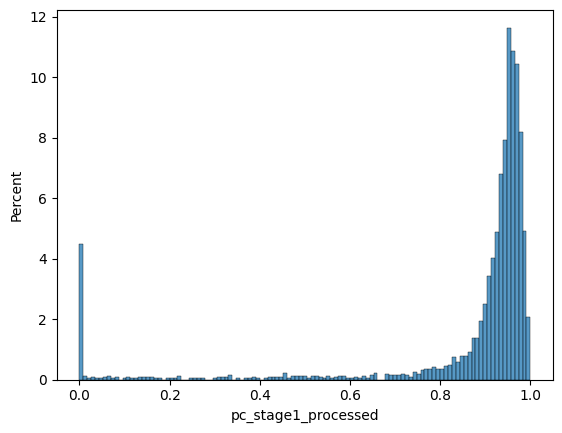

In [196]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

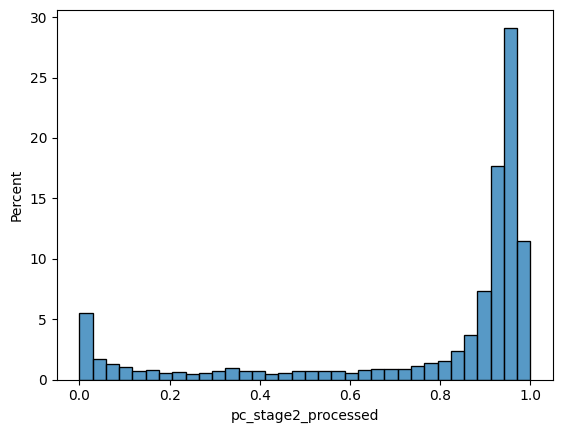

In [197]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

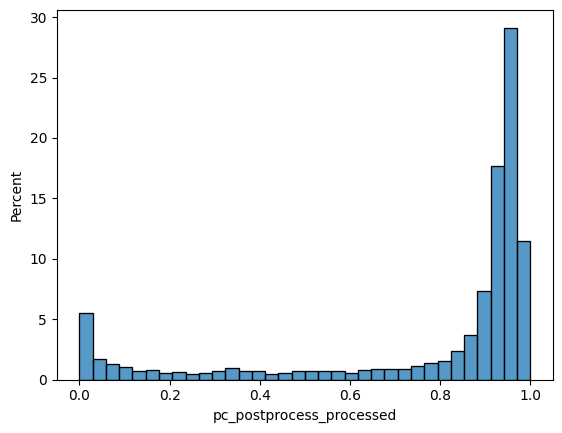

In [198]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

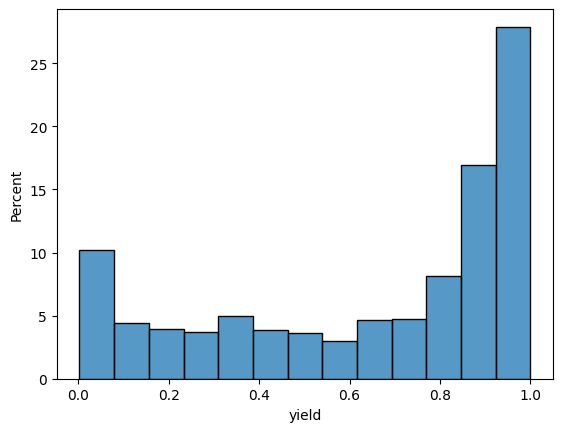

In [199]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')

BATCH II:

In [200]:
df_summary = pd.read_csv(logDir_II + 'process_summary.csv')

<Axes: xlabel='pc_stage1_processed', ylabel='Percent'>

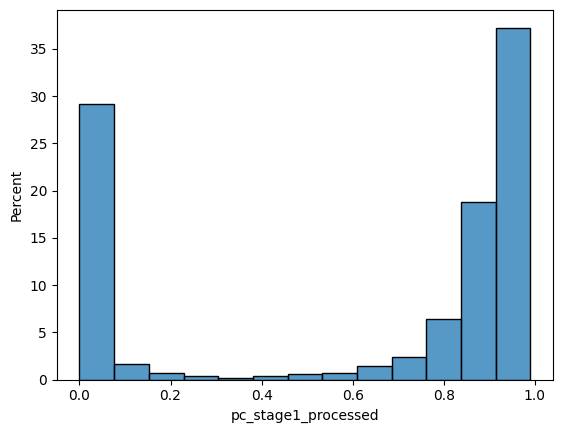

In [201]:
df_summary['pc_stage1_processed'] = df_summary['n_stage1_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage1_processed', stat='percent')

<Axes: xlabel='pc_stage2_processed', ylabel='Percent'>

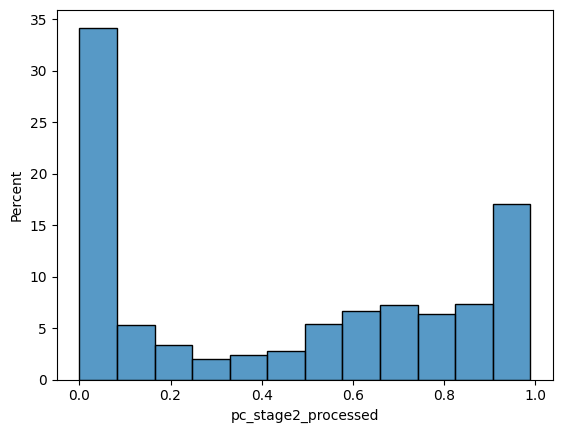

In [202]:
df_summary['pc_stage2_processed'] = df_summary['n_stage2_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_stage2_processed', stat='percent')

<Axes: xlabel='pc_postprocess_processed', ylabel='Percent'>

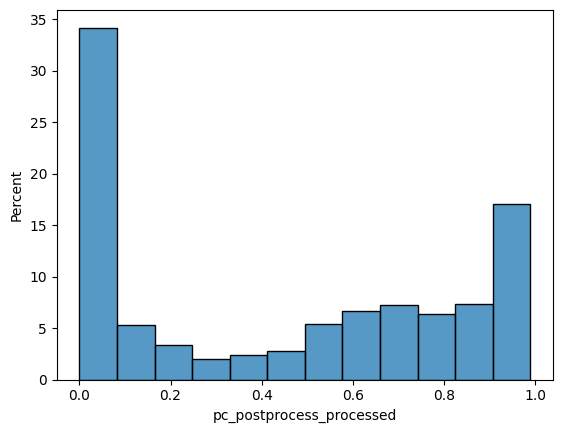

In [203]:
df_summary['pc_postprocess_processed'] = df_summary['n_postprocess_processed']/df_summary['n_images']
sns.histplot(data=df_summary, x='pc_postprocess_processed', stat='percent')

<Axes: xlabel='yield', ylabel='Percent'>

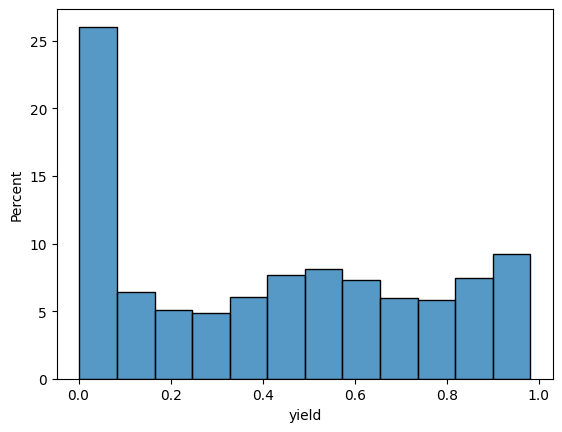

In [204]:
df_summary['yield'] = df_summary['n_master']/df_summary['n_images']
sns.histplot(data=df_summary, x='yield', stat='percent')

#  

#  

#### Data distribution by ground station:

In [ ]:
df2 = df_master.copy(deep=True)
df2['Station_Number_Station_Code_processed_image_class'] = df2['Station_Number'].astype(int).astype(str) + '_' + df2['Station_Code'] + '_' + df2['processed_image_class']

In [ ]:
df_master_by_stn = df2.groupby(['Station_Number']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn.head(10)

In [ ]:
df_master_by_stnname = df2.groupby(['Station_Name']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stnname.head(50)

In [ ]:
df_master_by_stn_code = df2.groupby(['Station_Number_Station_Code_processed_image_class']).count()[['filename']].sort_values('filename', ascending=False)
df_master_by_stn_code.head(20)

- show geographic distribution by metatype type 
- show geographic distribution by year

- show how each ground station used the same metadata type over time (metadata composition by ground station over time)


- Matplotlib - basemap
- cartopy
- ipyleaflet (interactive)
- plotly 

- make availability plot for each ground station
    - could be sparklines to show amount of data vs time, by ground station

In [ ]:
df_master['Station_Code'].unique()

In [ ]:
df_master_stn = df_master.loc[df_master['Station_Code'] == 'COL']
len(df_master_stn)

In [ ]:
df_master_stn.head()

#  